In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() # Use default plots from seaborn
sns.set_style("white", {'axes.grid' : False}) # White background

In [3]:
# Read MTurk results into dataframes
s4_df = pd.read_csv('section4-original-semantic-labels.csv')
print(s4_df.shape) 
s5_df = pd.read_csv('section5-reproduction-semantic-labels.csv')
print(s5_df.shape)

(4000, 37)
(9930, 39)


In [4]:
# Map responses to numerical values on Likert scale
label_map = { 'Strongly Agree': 5, 'Agree': 4, 'Not sure': 3, 'Disagree': 2, 'Strongly Disagree': 1}
s4_df['label'] = s4_df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])
s5_df['label'] = s5_df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])

In [5]:
print('s4 mean:', s4_df['label'].mean())
print('s5 mean:', s5_df['label'].mean())

s4 mean: 3.13225
s5 mean: 4.025176233635448


In [6]:
print('s4.columns:', s4_df.columns)
print('s5.columns:', s5_df.columns)

s4.columns: Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate',
       'Input.USE_similarity', 'Input.dataset', 'Input.original_class',
       'Input.text1', 'Input.perturbed_class', 'Input.text2', 'Input.run_type',
       'Answer.semantic-similarity.label', 'Approve', 'Reject', 'label'],
      dtype='object')
s5.columns: Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'Auto

In [15]:
dataset_name_map = { 'movie_review': 'mr', 'yelp_polarity': 'yelp-sentiment' }
s4_df['dataset'] = s4_df['Input.dataset'].map(lambda x: dataset_name_map.get(x,x))

Text(0.5, 1.0, 'Score increases by dataset')

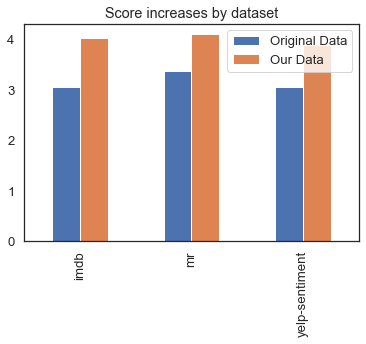

In [16]:
s4_by_dataset = s4_df.groupby('dataset')['label'].mean().to_frame().rename(columns={ 'label': 'Original Data' })
s5_by_dataset = s5_df.groupby('Input.dataset')['label'].mean().to_frame().rename(columns={ 'label': 'Our Data' })

ax = pd.concat((s4_by_dataset, s5_by_dataset), axis=1).plot(kind='bar')
ax.set_title('Score increases by dataset')

In [11]:
def _c(t):
    """ converts RGB tuple to a color format matplotlib understands """
    if len(t) == 3: #add opacity
        t = t + (255.0,)
    return [tuple((x/255. for x in t),)]

In [12]:
# original: get_ticks returns = [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
use_thresh_graph_yticks = ['', '1 - Strongly Disagree', '2 - Disagree', '3 - Not Sure', '4 - Agree', '5 - Strongly Agree']

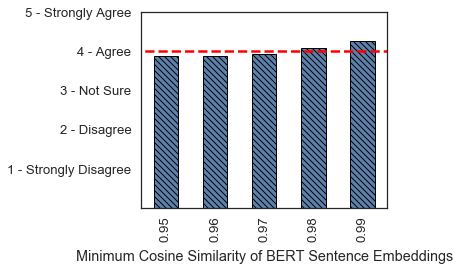

In [18]:
# fonts
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

# make graph
bert_df = s5_df[s5_df['Input.SE_Model'] == 'BERT']
ax = bert_df.groupby('Input.SE_Thresh')['label'].mean().plot(kind='bar', color=_c((75,115,164,230.)), 
                            edgecolor='black', linewidth=1.) 

#color=_c((75, 115, 165, 230.0)#
#sns.color_palette("cubehelix")
# ax = bert_df.groupby('Input.SE_Thresh')['label'].mean().plot(kind='bar'), palette="Blues_d")

# style graph
ax.set_ylim(0.0, 5.0) # This 
ax.set_yticklabels(use_thresh_graph_yticks)
# ax.set_title('Human responses across sentence encoding thresholds')
ax.set_xlabel('Minimum Cosine Similarity of BERT Sentence Embeddings')
ax.tick_params(axis='x', pad=2)
ax.tick_params(axis='y', pad=4)
ax.xaxis.labelpad = 8


# rotate x axis labels
# ax.set_xticklabels(ax.get_xticklabels()z, rotation=0, ha='right')

# add hatches
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']

# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i] * 3)
    thisbar.set_hatch('\\'*4)

# add horizontal line at y=4
xs = np.linspace(-5, 5)
horiz_line_data = np.array([4 for i in range(len(xs))])
# move numbers to above bars
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

# plot and save
ax.plot(xs, horiz_line_data, 'r--', color='red') 
plt.savefig('bert-thresh-final.pdf', format='pdf', bbox_inches="tight")
plt.tight_layout()

In [19]:
bert_df.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Input.text2,Input.score_1,Input.score_2,Input.SE_Thresh,Input.dataset,Input.SE_Model,Answer.semantic-similarity.label,Approve,Reject,label
0,3KG2UQJ0MJOVVULKEVTLJU67OMANQR,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,"this film , a certain scene in particular , br...",0.61516,0.614089,0.97,mr,BERT,Strongly Disagree,NaN,NaN,1
1,3KG2UQJ0MJOVVULKEVTLJU67OMANQR,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,"this film , a certain scene in particular , br...",0.61516,0.614089,0.97,mr,BERT,Agree,NaN,NaN,4
2,3KG2UQJ0MJOVVULKEVTLJU67OMANQR,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,"this film , a certain scene in particular , br...",0.61516,0.614089,0.97,mr,BERT,Agree,NaN,NaN,4
3,3KG2UQJ0MJOVVULKEVTLJU67OMANQR,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,"this film , a certain scene in particular , br...",0.61516,0.614089,0.97,mr,BERT,Agree,NaN,NaN,4
4,3KG2UQJ0MJOVVULKEVTLJU67OMANQR,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,"this film , a certain scene in particular , br...",0.61516,0.614089,0.97,mr,BERT,Agree,NaN,NaN,4


total_answers: 180
5
total_answers: 566
5
total_answers: 235
5
total_answers: 2136
5
total_answers: 1883
5


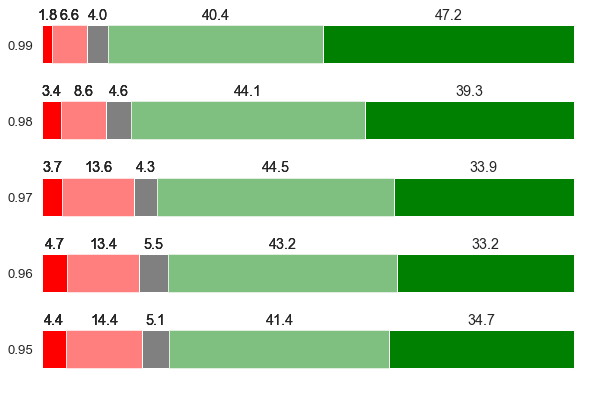

In [148]:
answer_order = ['Strongly Disagree', 'Disagree', 'Not sure', 'Agree', 'Strongly Agree']
answer_colors=['red','red','gray','green','green']

inputs_by_thresh = bert_df.groupby('Input.SE_Thresh')
answers = bert_df['Answer.semantic-similarity.label'].unique()
answers = sorted(answers, key=lambda x: answer_order.index(x))

fig, ax = plt.subplots(figsize=(10,7))  
margin_in_pixels = np.zeros(len(answers))

#ɣ = 0.2; 
#get_alpha = lambda i: (1-ɣ) + ɣ * (float(i+1) / len(colors))
get_alpha = lambda i: [1, 0.5, 1.0, 0.5, 1][i]
answers_per_bucket = 1000.

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        perc = rect.get_width() / answers_per_bucket * 100.
        perc = round(perc, 2)
        perc = str(perc) #+ '%'
        width = rect.get_width()
        height = rect.get_height()
        ax.annotate('{}'.format(perc),
                    xy=(rect.get_x() + width / 2, rect.get_y() + height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for i, answer in enumerate(answers):
    answers_by_thresh = bert_df[bert_df['Answer.semantic-similarity.label'] == answer].groupby('Input.SE_Thresh').count()
    answers_by_thresh['margin_bottom'] = margin_bottom
    total_answers = answers_by_thresh['Answer.semantic-similarity.label'].sum()
    print('total_answers:', total_answers)
    print(answers_by_thresh['Answer.semantic-similarity.label'].count())
    ax = answers_by_thresh.plot.barh(y='Answer.semantic-similarity.label', left=margin_in_pixels, 
                        stacked=True, color=answer_colors[i],
                        alpha=get_alpha(i), legend=False,
                        ax=ax)
    autolabel(ax.patches)
    margin_in_pixels += answers_by_thresh['Answer.semantic-similarity.label']
    
fig.patch.set_visible(False)    
plt.box(on=None)
ax.set_ylabel('')
# ax.set_ylabel('BERT Sentence Encoder Cosine Similarity Threshold')
ax.get_xaxis().set_visible(False) # Hide x axis


plt.show()

In [136]:
(180 + 566 + 235 + 2136 + 1883) / 5

1000.0